In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# /kaggle/input/brain-mri-images-for-brain-tumor-detection/no/34 no.jpg
# /kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y92.png

In [2]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=cb5ff4e6593974ef25fbd62d86dc4ceb4d34cd149d5d81164145a5c9e4094903
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils


In [3]:
import shutil
import imutils
import random
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [4]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix,plot_confusion_matrix

In [17]:
main_dir = r"D://Semester 2//DMML2//All Files//braintumour_dataset"

In [18]:
os.listdir(main_dir)

['no', 'yes']

In [19]:
train, test, valid = [],[],[]


for fol in os.listdir(main_dir):
    fol_path = os.path.join(main_dir, fol)
    img_count = len(os.listdir(fol_path))
    print(fol_path)
    print(img_count)
    list_files = os.listdir(fol_path)
    random.shuffle(list_files)
    
    for idx, file in enumerate(list_files):
        img = os.path.join(fol_path, file)
        if idx < 5:
            test.append(img)
        elif idx < img_count*6//10:
            valid.append(img)
        else:
            train.append(img)

D:\Master's In Data Science & Analytics\Semester 2\archive (18)\brain_tumor_dataset\no
98
D:\Master's In Data Science & Analytics\Semester 2\archive (18)\brain_tumor_dataset\yes
155


In [20]:
len(train), len(test), len(valid)

(102, 10, 141)

In [21]:
test

["D:\\Master's In Data Science & Analytics\\Semester 2\\archive (18)\\brain_tumor_dataset\\no\\15 no.jpg",
 "D:\\Master's In Data Science & Analytics\\Semester 2\\archive (18)\\brain_tumor_dataset\\no\\N5.jpg",
 "D:\\Master's In Data Science & Analytics\\Semester 2\\archive (18)\\brain_tumor_dataset\\no\\No16.jpg",
 "D:\\Master's In Data Science & Analytics\\Semester 2\\archive (18)\\brain_tumor_dataset\\no\\12 no.jpg",
 "D:\\Master's In Data Science & Analytics\\Semester 2\\archive (18)\\brain_tumor_dataset\\no\\no 3.jpg",
 "D:\\Master's In Data Science & Analytics\\Semester 2\\archive (18)\\brain_tumor_dataset\\yes\\Y252.jpg",
 "D:\\Master's In Data Science & Analytics\\Semester 2\\archive (18)\\brain_tumor_dataset\\yes\\Y195.JPG",
 "D:\\Master's In Data Science & Analytics\\Semester 2\\archive (18)\\brain_tumor_dataset\\yes\\Y242.JPG",
 "D:\\Master's In Data Science & Analytics\\Semester 2\\archive (18)\\brain_tumor_dataset\\yes\\Y24.jpg",
 "D:\\Master's In Data Science & Analytics\

In [24]:
def load_images(folder):
    X,y,labels  = [], [], []
    for f_f in folder:
        # Adding Images
        img = cv2.imread(f_f)
        X.append(img)
        # adding label
        label = f_f.split(os.sep)[-1]
        labels.append(label)
        extension = f_f.split(os.sep)[-2]
        if extension=='yes':
            y.append(1)
        else:
            y.append(0)
            
    idx = np.arange(len(X))
#     np.random.shuffle(idx)
    X = [X[i] for i in idx]
    y = [y[i] for i in idx]
    return np.array(X), np.array(y), labels

In [25]:
test_img, test_label,test_label_name   = load_images(test)
valid_img, valid_label,valid_label_name   = load_images(valid)
train_img, train_label,train_label_name   = load_images(train)

<ipython-input-24-d175ed7e1d5a>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(X), np.array(y), labels


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


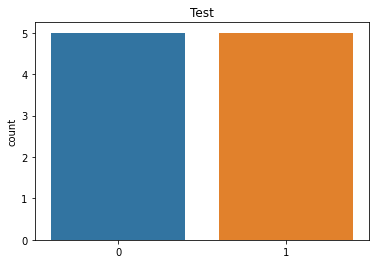

In [26]:
sns.countplot(test_label)
plt.title("Test");

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


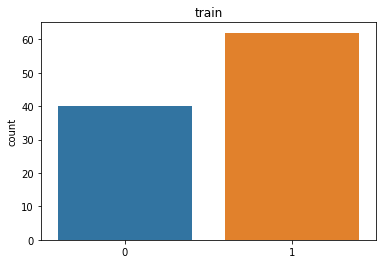

In [27]:
sns.countplot(train_label)
plt.title("train");

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


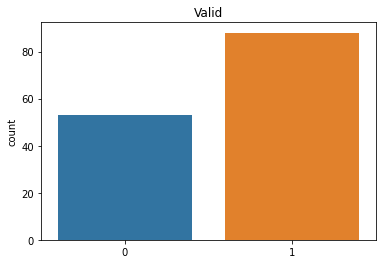

In [28]:
sns.countplot(valid_label)
plt.title("Valid");

In [29]:
train_img.shape

(102,)

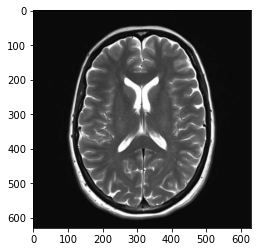

In [30]:
plt.imshow(train_img[0])

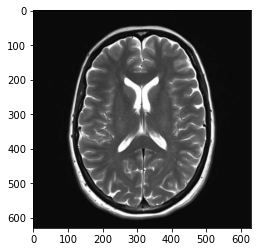

In [31]:
plt.imshow(cv2.imread(train[0]))

In [32]:
train_label.shape

(102,)

In [33]:
fixed_IMG_size = (224,224)

In [34]:
def gridPlotImages(img_path):
    o_img = cv2.imread(img_path)
    o_img = cv2.resize(o_img, dsize = fixed_IMG_size, 
                      interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(o_img, cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    
    _, thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    
    
    # find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    # find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    # add contour on the image
    img_cnt = cv2.drawContours(o_img.copy(), [c], -1, (0, 255, 255), 4)

    # add extreme points
    img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
    img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
    img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
    img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

    # crop
    ADD_PIXELS = 0
    new_img = o_img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

    #plotting
    fig, axes = plt.subplots(1,4, figsize=(15,5))
    titles = [
    'Step 1. Get the original image', 
    'Step 2. Find the biggest contour', 
    'Step 3. Find the extreme points',
    'Step 4. Crop the image'
    ]

    images = [o_img, img_cnt, img_pnt, new_img]

    for i, axes in enumerate(axes.flat):
        axes.imshow(images[i])
        axes.set_axis_off()
        axes.set_title(titles[i])
    

In [35]:
test

["D:\\Master's In Data Science & Analytics\\Semester 2\\archive (18)\\brain_tumor_dataset\\no\\15 no.jpg",
 "D:\\Master's In Data Science & Analytics\\Semester 2\\archive (18)\\brain_tumor_dataset\\no\\N5.jpg",
 "D:\\Master's In Data Science & Analytics\\Semester 2\\archive (18)\\brain_tumor_dataset\\no\\No16.jpg",
 "D:\\Master's In Data Science & Analytics\\Semester 2\\archive (18)\\brain_tumor_dataset\\no\\12 no.jpg",
 "D:\\Master's In Data Science & Analytics\\Semester 2\\archive (18)\\brain_tumor_dataset\\no\\no 3.jpg",
 "D:\\Master's In Data Science & Analytics\\Semester 2\\archive (18)\\brain_tumor_dataset\\yes\\Y252.jpg",
 "D:\\Master's In Data Science & Analytics\\Semester 2\\archive (18)\\brain_tumor_dataset\\yes\\Y195.JPG",
 "D:\\Master's In Data Science & Analytics\\Semester 2\\archive (18)\\brain_tumor_dataset\\yes\\Y242.JPG",
 "D:\\Master's In Data Science & Analytics\\Semester 2\\archive (18)\\brain_tumor_dataset\\yes\\Y24.jpg",
 "D:\\Master's In Data Science & Analytics\

In [57]:
gridPlotImages(r"D://Semester 2//DMML2//All Files//yes//Y15.jpg")

In [41]:
def preprocessingImages(set_images, fixed_IMG_size):
    
    preprocess_set = []
    for img in set_images:
        o_img = cv2.imread(img)
        o_img = cv2.resize(o_img, dsize = fixed_IMG_size, 
                          interpolation=cv2.INTER_CUBIC)
        gray = cv2.cvtColor(o_img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5,5), 0)

        _, thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)


        # find contours in thresholded image, then grab the largest one
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # find the extreme points
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        # crop
        ADD_PIXELS = 0
        new_img = o_img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        
        preprocess_set.append(new_img)
        
    return np.array(preprocess_set)

In [42]:
X_train_process = preprocessingImages(train,fixed_IMG_size)
X_valid_process = preprocessingImages(valid,fixed_IMG_size)
X_test_process = preprocessingImages(test,fixed_IMG_size)

<ipython-input-41-b079378666f3>:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(preprocess_set)


Text(0.5, 1.0, 'Crop')

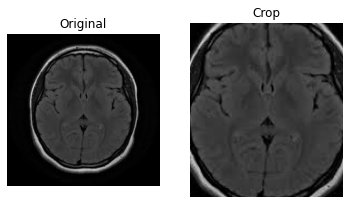

In [43]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(train_img[5])
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(X_train_process[5])
ax[1].axis('off')
ax[1].set_title('Crop')

In [44]:
test_label

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [45]:
len(X_test_process)

10

In [70]:
os.makedirs('../outputs')

In [67]:
os.chdir(main_dir)

In [68]:
os.getcwd()

"D:\\Master's In Data Science & Analytics\\Semester 2\\archive (18)\\brain_tumor_dataset"

In [48]:
os.makedirs('images')

In [49]:
os.listdir('../outputs/')

['images']

In [60]:
def saveImagesDirectory(X,y,label_name,folder_name):
    
    count = 0
    for id_, img in enumerate(X):
        if y[id_]==0:
            cv2.imwrite(folder_name+'/'+'NO' + '/' + label_name[id_],img)
        else:
            cv2.imwrite(folder_name+'/'+'YES' + '/' + label_name[id_],img)
        count += 1
    print(f'{count} images written in {folder_name}')

In [63]:
saveImagesDirectory(X_test_process,test_label,test_label_name,'images/test')

10 images written in images/test


In [62]:
saveImagesDirectory(X_valid_process,valid_label,valid_label_name,'images/valid')
saveImagesDirectory(X_train_process,train_label,train_label_name,'images/train')

141 images written in images/valid
102 images written in images/train


In [55]:
# Augmnetation

In [66]:
lis_images = os.listdir('outputs/images/test/YES')
lis_images

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'outputs/images/test/YES'

In [40]:
lis_images[0]

'Y157.JPG'

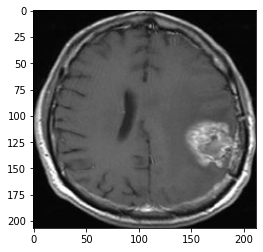

In [41]:
plt.imshow(cv2.imread(os.path.join('images/test/YES',lis_images[0])));

In [42]:
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    brightness_range = [0.5, 1.5],
    horizontal_flip = True,
    vertical_flip = True
            )

valid_datagen = ImageDataGenerator()

In [43]:
TRAIN_LEN, VAL_LEN = X_train_process.shape[0], X_train_process.shape[0]

In [44]:
train_dir = 'images/train'
valid_dir = 'images/valid'
test_dir = 'images/test'

In [45]:
TRAIN_BATCH_SIZE , VAL_BATCH_SIZE = 32, 16

In [46]:
train_generator = train_datagen.flow_from_directory(
                    directory = train_dir,
                    color_mode = 'rgb',
                    target_size = fixed_IMG_size,
                    class_mode = 'binary'
                    )

valid_generator = valid_datagen.flow_from_directory(
                    directory = valid_dir,
                    color_mode = 'rgb',
                    target_size = fixed_IMG_size,
                    class_mode = 'binary'
                    )

Found 158 images belonging to 2 classes.
Found 85 images belonging to 2 classes.


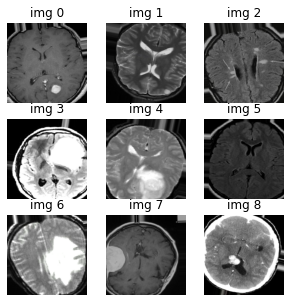

In [47]:
#plot a data aug
x = train_generator.next()[0].astype('uint8') #1 batch
fig, axes = plt.subplots(3, 3, figsize=(5,5))
for i, axi in enumerate(axes.flat):
    axi.imshow(x[i])
    axi.set_title(f'img {i}')
    axi.set_axis_off();

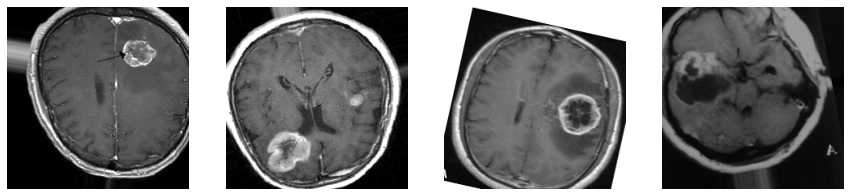

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

for i in range(4):

    # convert to unsigned integers for plotting
    image = train_generator.next()[0].astype('uint8')

    # plot raw pixel data
    ax[i].imshow(image[i])
    ax[i].axis('off')

In [49]:
# Model Building

In [50]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
base_model = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=fixed_IMG_size + (3,)
)

2022-04-24 06:23:11.567157: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 06:23:11.661035: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 06:23:11.662011: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 06:23:11.663969: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


In [52]:
# freeze base layers
for layer in base_model.layers:
    layer.trainable=False

In [53]:
NUM_CLASSES = 1

model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

# model.layers[0].trainable = False 

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 25089     
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


In [54]:
EPOCHS = 50
early_stop = EarlyStopping(monitor='accuracy',patience = 6)

my_callbacks = [early_stop]
#                 tf.keras.callbacks.TensorBoard(log_dir='./logs'),]

In [55]:
history = model.fit(
    train_generator,
#     steps_per_epoch=TRAIN_LEN // TRAIN_BATCH_SIZE,
    epochs=EPOCHS, 
    validation_data=valid_generator,
#     validation_steps=VAL_LEN // VAL_BATCH_SIZE,
    verbose = 1,
    callbacks=[my_callbacks]
)

2022-04-24 06:23:15.945389: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-04-24 06:23:17.821193: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


5/5 [==============================] - 16s 2s/step - loss: 8.1594 - accuracy: 0.4494 - val_loss: 3.6732 - val_accuracy: 0.5647
Epoch 2/50
5/5 [==============================] - 3s 518ms/step - loss: 5.8031 - accuracy: 0.5696 - val_loss: 5.2186 - val_accuracy: 0.5176
Epoch 3/50
5/5 [==============================] - 2s 453ms/step - loss: 5.3724 - accuracy: 0.6456 - val_loss: 3.8272 - val_accuracy: 0.5882
Epoch 4/50
5/5 [==============================] - 2s 445ms/step - loss: 5.0016 - accuracy: 0.6519 - val_loss: 2.0224 - val_accuracy: 0.7294
Epoch 5/50
5/5 [==============================] - 2s 453ms/step - loss: 4.3138 - accuracy: 0.6329 - val_loss: 1.9077 - val_accuracy: 0.7294
Epoch 6/50
5/5 [==============================] - 3s 591ms/step - loss: 2.8128 - accuracy: 0.7215 - val_loss: 1.9615 - val_accuracy: 0.7412
Epoch 7/50
5/5 [==============================] - 3s 544ms/step - loss: 3.0457 - accuracy: 0.6899 - val_loss: 1.8349 - val_accuracy: 0.7882
Epoch 8/50
5/5 [=================

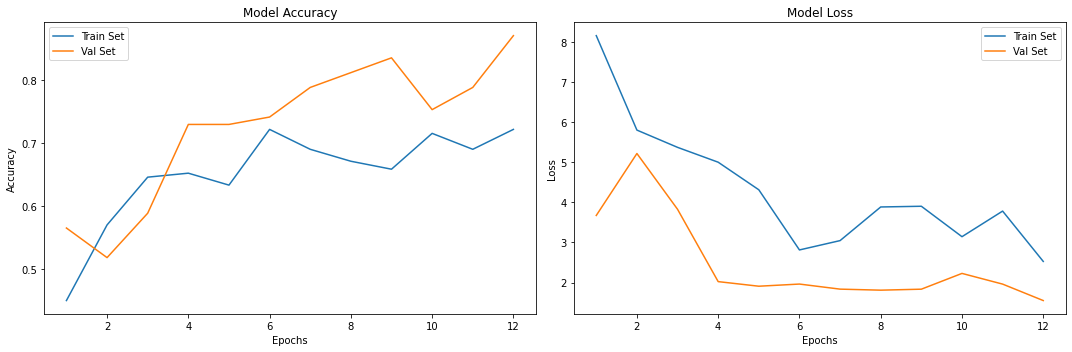

In [56]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)


plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

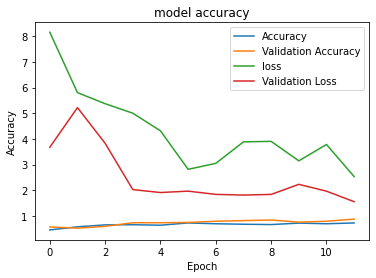

In [57]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [58]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [59]:
# validate on test set
prediction_targets  = []
for in_, _ in enumerate(X_test_process):
    img = X_test_process[in_]
    img = cv2.resize(img, fixed_IMG_size)
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    if prediction >0.5:
        prediction_targets.append(1)
    else:
        prediction_targets.append(0)
    
# predictions = model.predict(processed_imgs)
# predictions = [1 if x >0.5 else 0 for x in predictions]
# print(predictions)
accuracy = accuracy_score(test_label, prediction_targets)
print(f'Test Accuracy = {accuracy:.3}')

confusion_mtx = confusion_matrix(test_label, prediction_targets)
print("Confusion Matrix")
print(confusion_mtx)

Test Accuracy = 0.8
Confusion Matrix
[[3 2]
 [0 5]]


In [60]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel

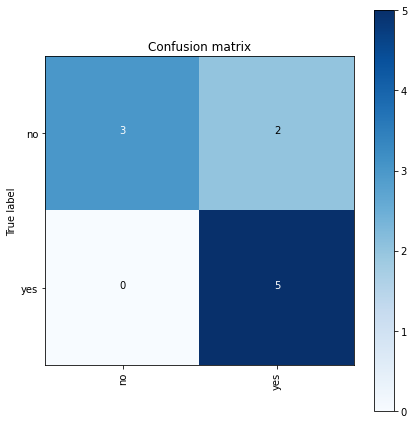

In [61]:
cm = plot_confusion_matrix(confusion_mtx, classes=['no', 'yes'], normalize=False) #list(labels.items())

In [62]:
test_label

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [63]:
prediction_targets

[0, 0, 1, 0, 1, 1, 1, 1, 1, 1]